In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
dataset = pd.read_csv('train.csv')

# EDA

In [3]:
dataset.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.tail(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41990,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41992,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41993,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41994,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# checking null values
dataset.isnull().sum().sum()

0

In [6]:
# Since the pixel value ranges from 0 t0 255,
# they can be scaled to 0 and 1,
# For this an appropriate threshold is needed so that no information is lost 

In [7]:
X = dataset.iloc[:,1:]
y = dataset['label']

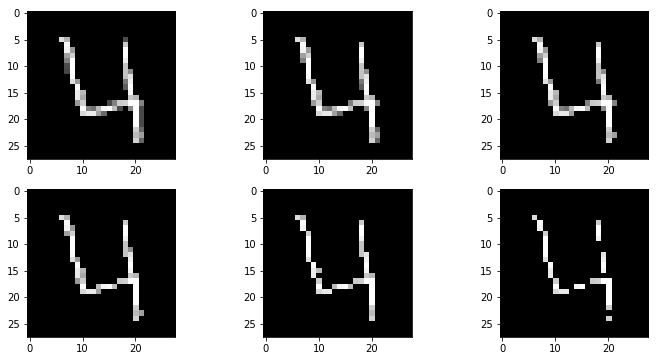

In [8]:
# EDA and trying dfferent threshold

# Test done for differnt digits to find appropriate threshold
threshold = [70,90,110,140,170,200]
fig = plt.figure(figsize=(12,6))
row = 2
col = 3
plot_num = 1
for val in threshold:
    num = []
    digit = X.iloc[3,:]
    for pixel in digit:
        if pixel < val:
            pixel = 0
        num.append(pixel)    
    img = np.array(num)
    img = np.reshape(img,newshape=(28,28))
    fig.add_subplot(row, col, plot_num)
    plot_num = plot_num + 1
    plt.imshow(img,cmap='gray')
plt.show()

# Pre Processing

In [9]:
# The appropriate threshold is in between 90 and 110 so lets take there mean i.e 100.
X = (np.array(X)[:,1:] >= 100).astype(int)

In [10]:
# Splittng the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [11]:
# Since  the data conatins many columns so applying pca
from sklearn.decomposition import PCA
pca = PCA(n_components = 33)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

var = pca.explained_variance_ratio_*100
cumsum =  var.cumsum()
var.sum()

# the value of n_components is choosen by the help of best fitted model.

66.45356489551529

# Model Selection

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='saga',multi_class='multinomial')

classifier.fit(pca_train,y_train)
y_pred = classifier.predict(pca_test)

In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.8937142857142857


In [14]:
from sklearn.svm import SVC
classifier = SVC()

classifier.fit(pca_train,y_train)
y_pred = classifier.predict(pca_test)

/home/tushar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.977047619047619


In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(pca_train,y_train)
y_pred = classifier.predict(pca_test)

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.8260952380952381


In [18]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
classifier = RandomForestClassifier(n_estimators = 101)

classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.962


In [20]:
# SVM Seems to outperform other models so it is choosen as the approprite model.

# Parameter Tuning And GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV
params = {"C":[0.1,1.0,10]
          }
from sklearn.svm import SVC
classifier = SVC()

clas = GridSearchCV(classifier, params, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')
clas.fit(pca_train, y_train)

clas.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.2min finished
/home/tushar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
classifier = SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.01, verbose=False)

classifier.fit(pca_train,y_train)
y_pred = classifier.predict(pca_test)

from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.9815238095238096


In [40]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
mat

array([[1018,    0,    2,    0,    0,    0,    3,    0,    0,    2],
       [   1, 1140,    1,    0,    1,    1,    1,    1,    0,    0],
       [   2,    2, 1054,    3,    1,    1,    0,    6,    3,    0],
       [   2,    1,    4, 1122,    0,    8,    0,    2,    8,    4],
       [   3,    0,    1,    0, 1000,    0,    5,    3,    1,   11],
       [   1,    1,    0,    7,    0,  879,    6,    0,    1,    3],
       [   3,    1,    0,    0,    0,    2, 1001,    0,    3,    0],
       [   0,    7,    6,    0,    2,    1,    0, 1109,    1,    9],
       [   0,    2,    2,    4,    3,    3,    1,    1,  988,    1],
       [   4,    1,    1,    6,    8,    6,    2,    7,    4,  995]])

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1025
           1       0.99      0.99      0.99      1146
           2       0.98      0.98      0.98      1072
           3       0.98      0.97      0.98      1151
           4       0.99      0.98      0.98      1024
           5       0.98      0.98      0.98       898
           6       0.98      0.99      0.99      1010
           7       0.98      0.98      0.98      1135
           8       0.98      0.98      0.98      1005
           9       0.97      0.96      0.97      1034

   micro avg       0.98      0.98      0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500



# Thank you